In [ ]:
#Import Section
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import statistics




In [ ]:
df = pd.read_csv('switerland with zeros.csv')
df['target'] = np.where(df['target'] > 1, 1, np.where(df['target'] == 1, 0, df['target']))
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,32,1,1,6,0,1,2,7,2,20,2,1,1,1
1,34,1,4,9,0,1,1,29,2,2,2,1,1,1
2,35,1,4,1,0,1,2,9,3,1,1,1,4,1
3,36,1,4,8,0,1,2,5,3,16,3,1,3,1
4,38,0,4,7,0,1,2,35,2,10,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70,1,4,9,0,2,3,55,3,4,3,1,4,1
119,70,1,4,12,0,3,2,32,3,35,3,1,4,1
120,72,1,3,18,0,1,4,12,2,32,3,3,1,0
121,73,0,3,18,0,2,3,67,2,4,2,1,2,1


In [ ]:
#splitting into features and class label

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('target',axis = 1)
y = df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 23)
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KNN

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m1 = 'knn classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train_fold, y_train_fold)
    knnpred = knn.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, knnpred)
    fold_accuracy = accuracy_score(y_test_fold, knnpred)*100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

knnaccuracy = total_accuracy / k
print("Mean Accuracy =", knnaccuracy)

Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[13]]
Accuracy for this fold: 92.3076923076923
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 12]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 10]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Mean Accuracy = 93.52564102564102


In [ ]:
#Logistic Regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
m2 = 'lr classifier'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = train_test_split(X, test_size=0.3, random_state=23)
    y_train_fold, y_test_fold = train_test_split(y, test_size=0.3, random_state=23)


    lr = LogisticRegression()
    lr.fit(X_train_fold,y_train_fold)
    lrpred = lr.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, lrpred)
    fold_accuracy = accuracy_score(y_test_fold, lrpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

lraccuracy = total_accuracy / k
print("Mean Accuracy =", lraccuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Accuracy for this fold: 91.8918918918919
Confusion Matrix for Fold:
[[ 0  3]
 [ 0 34]]
Mean Accuracy = 91.89189189189189


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#SVM
m3 = 'svm classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=0)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    Svm = SVC(kernel = 'linear',C=1)
    Svm.fit(X_train_fold,y_train_fold)
    Svmpred = Svm.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, Svmpred)
    fold_accuracy = accuracy_score(y_test_fold, Svmpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

svmaccuracy = total_accuracy / k
print("Mean Accuracy =", svmaccuracy)

Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[13]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[13]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Mean Accuracy = 92.62820512820512


In [ ]:
#DT
m4 = 'decision tree'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    dt = DecisionTreeClassifier(criterion='entropy',random_state = 0,max_depth=6)
    dt.fit(X_train_fold,y_train_fold)
    dtpred = dt.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, dtpred)
    fold_accuracy = accuracy_score(y_test_fold, dtpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

dtaccuracy = total_accuracy / k
print("Mean Accuracy =", dtaccuracy)

Accuracy for this fold: 76.92307692307693
Confusion Matrix for Fold:
[[ 0  0]
 [ 3 10]]
Accuracy for this fold: 69.23076923076923
Confusion Matrix for Fold:
[[0 1]
 [3 9]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  0]
 [ 1 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  0]
 [ 2 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  0]
 [ 2 10]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 1  1]
 [ 0 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Mean Accuracy = 83.91025641025642


In [ ]:
#GaussianNB

m5 = 'gaussian nb'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    nb = GaussianNB()
    nb.fit(X_train_fold,y_train_fold)
    nbpred = nb.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, nbpred)
    fold_accuracy = accuracy_score(y_test_fold, nbpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

nbaccuracy = total_accuracy / k
print("Mean Accuracy =", nbaccuracy)

Accuracy for this fold: 53.84615384615385
Confusion Matrix for Fold:
[[0 0]
 [6 7]]
Accuracy for this fold: 30.76923076923077
Confusion Matrix for Fold:
[[0 1]
 [8 4]]
Accuracy for this fold: 15.384615384615385
Confusion Matrix for Fold:
[[ 1  1]
 [10  1]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  0]
 [ 2 10]]
Accuracy for this fold: 50.0
Confusion Matrix for Fold:
[[0 1]
 [5 6]]
Accuracy for this fold: 41.66666666666667
Confusion Matrix for Fold:
[[0 0]
 [7 5]]
Accuracy for this fold: 66.66666666666666
Confusion Matrix for Fold:
[[0 0]
 [4 8]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[1 0]
 [2 9]]
Accuracy for this fold: 41.66666666666667
Confusion Matrix for Fold:
[[2 0]
 [7 3]]
Accuracy for this fold: 75.0
Confusion Matrix for Fold:
[[1 0]
 [3 8]]
Mean Accuracy = 54.16666666666667


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
m6 = 'qda classifier'

k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train_fold, y_train_fold)
    qdapred = qda.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, qdapred)
    fold_accuracy = accuracy_score(y_test_fold, qdapred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

qdaaccuracy = total_accuracy / k
print("Mean Accuracy =", qdaaccuracy)


Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[13]]
Accuracy for this fold: 92.3076923076923
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 12]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 10]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Mean Accuracy = 93.52564102564102


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

In [ ]:

from sklearn.ensemble import RandomForestClassifier
m7 = 'rf classifier'
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    rf = RandomForestClassifier(n_estimators=5, random_state=2,max_depth=5)
    rf.fit(X_train_fold, y_train_fold)
    rfpred = rf.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, rfpred)
    fold_accuracy = accuracy_score(y_test_fold, rfpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

rfaccuracy = total_accuracy / k
print("Mean Accuracy =", rfaccuracy)

Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[13]]
Accuracy for this fold: 92.3076923076923
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 12]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  0]
 [ 1 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 10]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  1]
 [ 0 11]]
Mean Accuracy = 91.85897435897435


In [ ]:
m8 = 'adaboost classifier'
from sklearn.ensemble import AdaBoostClassifier
k = 10  # Number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=23)

total_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    base_classifier = DecisionTreeClassifier(max_depth=4)
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=20, random_state=23)
    adaboost_classifier.fit(X_train_fold, y_train_fold)
    boostpred = adaboost_classifier.predict(X_test_fold)
    cm = confusion_matrix(y_test_fold, boostpred)
    fold_accuracy = accuracy_score(y_test_fold, boostpred) * 100
    print('Accuracy for this fold:', fold_accuracy)
    total_accuracy += fold_accuracy
    print("Confusion Matrix for Fold:")
    print(cm)

boostaccuracy = total_accuracy / k
print("Mean Accuracy =", boostaccuracy)

Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  0]
 [ 2 11]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 11]]
Accuracy for this fold: 84.61538461538461
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 11]]
Accuracy for this fold: 100.0
Confusion Matrix for Fold:
[[12]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  0]
 [ 1 11]]
Accuracy for this fold: 91.66666666666666
Confusion Matrix for Fold:
[[ 0  0]
 [ 1 11]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  2]
 [ 0 10]]
Accuracy for this fold: 83.33333333333334
Confusion Matrix for Fold:
[[ 0  1]
 [ 1 10]]
Mean Accuracy = 87.05128205128206


Deep Learning Model

In [ ]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


input_layer = Input(shape=(X_train.shape[1],))
d1 = Dense(units=200, activation='relu')(input_layer)
d2 = Dense(units=100, activation='relu')(d1)
d3 = Dense(units=100, activation='relu')(d2)
d4 = Dense(units=100, activation='relu')(d3)
d5 = Dense(units=100, activation='relu')(d4)
d6 = Dense(units=100, activation='relu')(d5)
d7 = Dense(units=100, activation='relu')(d6)
d8 = Dense(units=100, activation='relu')(d7)
# d9 = Dense(units=100, activation='relu')(d8)
output_layer = Dense(units=1, activation='sigmoid')(d8)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with metrics and optimizer
model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="Sensitivity"),
             tf.keras.metrics.SpecificityAtSensitivity(0.5, name="Specificity"),
             tfa.metrics.F1Score(num_classes=1, threshold=0.5)],
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001)
)

# Train the model
model.fit(x=X_train, y=y_train, batch_size=100, epochs=400)

# Evaluate the model on the test data
test_loss, test_accuracy, sensitivity, specificity, f1_score = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("x=" + str(list(map('{:.2f}%'.format,f1_score))))


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Epoch 1/400
1/1 [==============================] - 6s 6s/step - loss: 0.6990 - accuracy: 0.1279 - Sensitivity: 0.0741 - Specificity: 0.2000 - f1_score: 0.1379
Epoch 2/400
1/1 [==============================] - 0s 41ms/step - loss: 0.6986 - accuracy: 0.1279 - Sensitivity: 0.0741 - Specificity: 0.2000 - f1_score: 0.1379
Epoch 3/400
1/1 [==============================] - 0s 30ms/step - loss: 0.6983 - accuracy: 0.1744 - Sensitivity: 0.1235 - Specificity: 0.2000 - f1_score: 0.2198
Epoch 4/400
1/1 [==============================] - 0s 30ms/step - loss: 0.6980 - accuracy: 0.1744 - Sensitivity: 0.1235 - Specificity: 0.2000 - f1_score: 0.2198
Epoch 5/400
1/1 [==============================] - 0s 30ms/step - loss: 0.6977 - accuracy: 0.1744 - Sensitivity: 0.1235 - Specificity: 1.0000 - f1_score: 0.2198
Epoch 6/400
1/1 [==============================] - 0s 31ms/step - loss: 0.6974 - accuracy: 0.1860 - Sensitivity: 0.1358 - Specificity: 0.6000 - f1_score: 0.2391
Epoch 7/400
1/1 [===================

In [ ]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest','adaboost classifier', 'K-Nearest Neighbour', 'Decision Tree', 'Support Vector Machine','Deep Learning Model ']
accuracy_scores = [lraccuracy,nbaccuracy,rfaccuracy,boostaccuracy,knnaccuracy,dtaccuracy,svmaccuracy,test_accuracy*100]
model_ev = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})
model_ev

,Model,Accuracy
0,Logistic Regression,91.891892
1,Naive Bayes,54.166667
2,Random Forest,91.858974
3,adaboost classifier,87.051282
4,K-Nearest Neighbour,93.525641
5,Decision Tree,83.910256
6,Support Vector Machine,92.628205
7,Deep Learning Model,91.891891


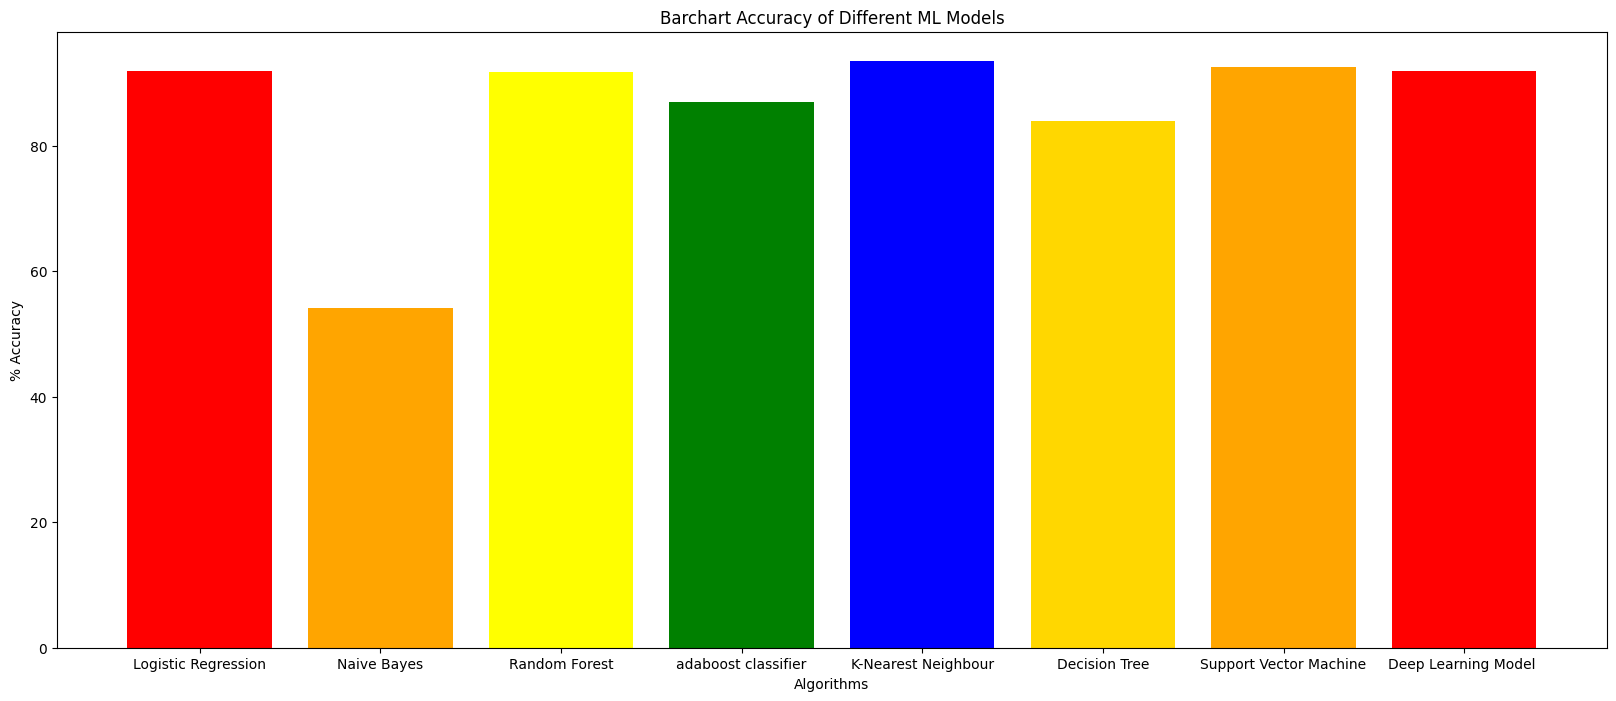

In [ ]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'gold', 'orange', ]
plt.figure(figsize=(20,8))
plt.title("Barchart Accuracy of Different ML Models")
plt.xlabel("Algorithms")
plt.ylabel("% Accuracy")
plt.bar(model_ev ['Model'], model_ev['Accuracy'], color = colors)
plt.show()